Basic Imports

In [1]:
import marketData
import Orders
import Plot
import Indicators

Getting price charts

                        Open     High      Low    Close    Volume
Time                                                             
2021-03-02 05:13:00  1.22599  1.22599  1.22279  1.22354  350609.6
2021-03-02 05:14:00  1.22410  1.22500  1.22119  1.22500  273529.0
2021-03-02 05:15:00  1.22499  1.22499  1.22227  1.22324  289224.0
2021-03-02 05:16:00  1.22361  1.22370  1.22216  1.22309  200407.4
2021-03-02 05:17:00  1.22308  1.22309  1.22025  1.22145  406545.2
...                      ...      ...      ...      ...       ...
2021-03-02 13:28:00  1.23386  1.23504  1.23369  1.23504  398502.9
2021-03-02 13:29:00  1.23504  1.23650  1.23407  1.23529  519250.3
2021-03-02 13:30:00  1.23549  1.23611  1.23370  1.23510  368931.7
2021-03-02 13:31:00  1.23500  1.23554  1.23325  1.23491  380178.8
2021-03-02 13:32:00  1.23491  1.23500  1.23451  1.23494   21609.0

[500 rows x 5 columns]
[        nan         nan         nan         nan         nan         nan
         nan         nan 69.8503674  57.16666

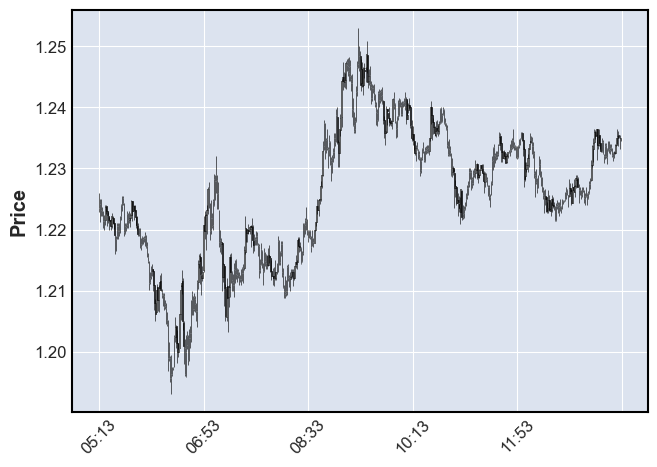

In [5]:
df = marketData.getPrices("ADAUSDT", "1m", 500)
print(df)
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
print(df)
Plot.plotCandles(df)

Getting SR levels from the order book

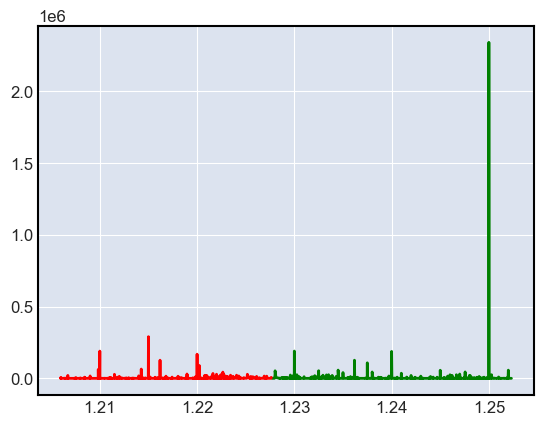

In [9]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])